In [18]:
using Pkg
Pkg.instantiate()
using TAMode
using Plots
using StaticArrays
using LinearAlgebra

In [19]:
using MCMCChains
chn = read("chain-file-10_1.jls", Chains)
summarize(chn)

Summary Statistics
     parameters      mean       std   naive_se      mcse       ess      rhat  
         Symbol   Float64   Float64    Float64   Float64   Float64   Float64  
                                                                              
        AXLexpr   33.7065    3.1431     0.1988    1.4321    5.4480    1.1274  
         Ig2rev    0.0329    0.0635     0.0040    0.0267    5.0778    1.1228  
         gasCur    0.1279    0.0902     0.0057    0.0332    7.2285    1.0841  
    internalize    0.0473    0.0105     0.0007    0.0031   11.1634    1.0478  
           kDeg    0.0212    0.0048     0.0003    0.0026    4.6812    1.1543  
           kRec    0.1071    0.0119     0.0008    0.0031   18.7062    0.9973  
  pYinternalize    1.0975    0.1366     0.0086    0.0163    9.8463    1.0011  
          scale    0.0212    0.0066     0.0004    0.0034    5.1126    1.1014  
      scaleSurf    0.0002    0.0002     0.0000    0.0001    5.4211    1.1160  
          sortF    0.6591    0.17

In [20]:
p = get(chn, [:gasCur, :xFwd]);
params = hcat(p.gasCur, p.xFwd);
Ig2rev = get(chn, :Ig2rev)[1];

In [21]:
gasPart = 10
diff = 1

AXL = 15.5
MerTK = 55
Tyro3 = 3.7

CompParams = vcat(diff, gasPart, params[1, :], AXL, MerTK, Tyro3, Ig2rev[1], [1.0, 1.0, 1.8, 100.0]);

tps = @SVector Float64[0.0001, 0.01, 0.1, 1];
r = 1:100;

In [22]:
pp = TAMode.compParamm(CompParams)
pY = TAMode.compTAM(tps, pp)
cplot = Array{Float64}(undef, length(tps), length(tps), 100)

4×4×100 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

[:, :, 2] =
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

[:, :, 3] =
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

...

[:, :, 98] =
 2.22685e-319  6.03914e-316  7.17524e-316  9.04516e-316
 2.297e-321    8.00596e-316  5.6838e-316   1.823e-321
 6.93805e-310  9.99476e-316  9.94485e-316  8.56111e-316
 1.13769e-315  1.02731e-315  9.04523e-316  6.93805e-310

[:, :, 99] =
 9.04531e-316  7.89465e-316  8.60729e-316  9.17879e-316
 9.0453e-316   7.45105e-316  5.06114e-316  9.04508e-316
 2.23397e-319  9.67589e-316  9.99771e-316  9.0451e-316
 7.1e-322      9.00625e-316  1.02549e-315  9.04515e-316

[:, :, 100] =
 9.04516e-316  2.2411e-319   6.96178e-316  8.11863e-316
 9.04515e-316  7.1e-322      1.00942e-315  5.68591e-316
 9.04511e-316  6.35249e-316  7.17519e-316  9.16988e-316
 9.04512e-316  8.32679e-316  6.5796

In [23]:
for rr = 1:100
    for t = 1:length(tps)
        pYdata = view(pY, t, :, rr)
        cplot[t, :, rr] .= dot(pYdata, TAMode.pYc)
    end
end

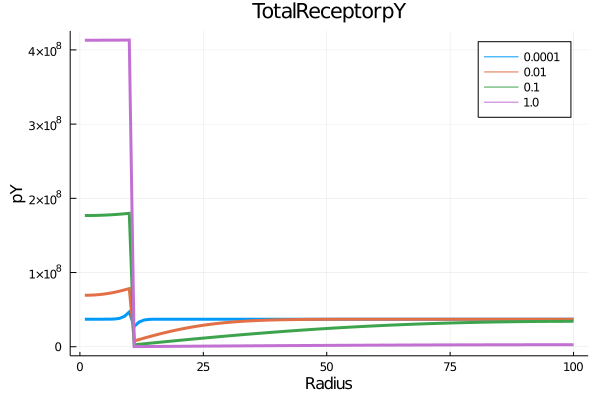

In [24]:
plotpY = view(cplot, 1, 1, :)
plot(r, plotpY, title = "Total Receptor pY", label = tps[1], lw = 3)

if length(tps) > 1
    for tt = 2:length(tps)
        plotpY = view(cplot, tt, tt, :)
        plot!(r, plotpY, label = tps[tt], lw = 3)
    end
end
xlabel!("Radius")
ylabel!("pY")

In [25]:
cplot_AXL = Array{Float64}(undef, length(tps), length(tps), 100)

4×4×100 Array{Float64,3}:
[:, :, 1] =
 6.4e-323      1.24e-322     1.33e-322     1.43e-322
 1.2e-322      1.3e-322      1.4e-322      1.53e-322
 6.93798e-310  6.93798e-310  6.93798e-310  6.93798e-310
 6.93798e-310  6.93798e-310  6.93798e-310  6.93798e-310

[:, :, 2] =
 1.6e-322      1.73e-322     1.9e-322      1.93e-322
 1.7e-322      1.83e-322     1.9e-322      1.93e-322
 6.93798e-310  6.93798e-310  6.93798e-310  6.93798e-310
 6.93798e-310  6.93798e-310  6.93798e-310  6.93798e-310

[:, :, 3] =
 2.0e-322      2.08e-322     2.1e-322      2.27e-322
 2.03e-322     2.08e-322     2.2e-322      2.47e-322
 6.93798e-310  6.93798e-310  6.93798e-310  6.93798e-310
 6.93798e-310  6.93798e-310  6.93798e-310  6.93798e-310

...

[:, :, 98] =
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

[:, :, 99] =
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

[:, :, 100] =
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0

In [26]:
for rr = 1:100
    for t = 1:length(tps)
        pYdata = view(pY, t, :, rr)
        cplot_AXL[t, :, rr] .= dot(pYdata, TAMode.recpSpecificC[1])
    end
end

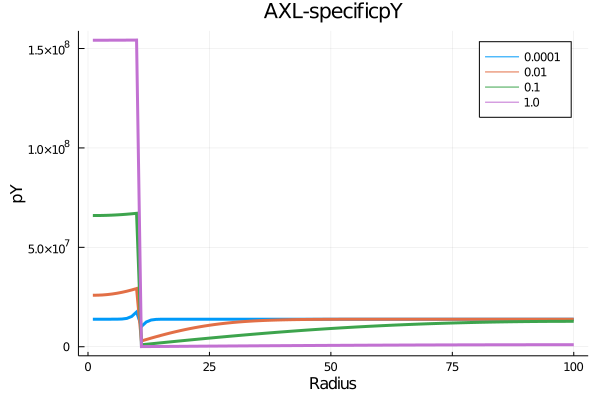

In [27]:
plotpY_AXL = view(cplot_AXL, 1, 1, :)
plot(r, plotpY_AXL, title = "AXL-specific pY", label = tps[1], lw = 3)

if length(tps) > 1
    for tt = 2:length(tps)
        plotpY_AXL = view(cplot_AXL, tt, tt, :)
        plot!(r, plotpY_AXL, label = tps[tt], lw = 3)
    end
end
xlabel!("Radius")
ylabel!("pY")

In [28]:
cplot_MerTK = Array{Float64}(undef, length(tps), length(tps), 100)

4×4×100 Array{Float64,3}:
[:, :, 1] =
 0.0       2.5e-323      0.0  6.15051e-316
 0.0       0.0           0.0  0.0
 0.0       3.53525e-311  0.0  7.29164e-316
 2.0e-323  4.24399e-314  0.0  0.0

[:, :, 2] =
 7.29164e-316  0.0  0.0           7.29163e-316
 8.48798e-314  0.0  0.0           2.122e-314
 0.0           0.0  7.29165e-316  7.29169e-316
 0.0           0.0  8.48798e-314  2.122e-314

[:, :, 3] =
 0.0  5.0e-324      3.26787e-311  0.0
 0.0  4.24399e-314  4.24399e-314  0.0
 0.0  0.0           1.2732e-313   1.37163e-316
 0.0  0.0           0.0           0.0

...

[:, :, 98] =
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

[:, :, 99] =
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

[:, :, 100] =
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [29]:
for rr = 1:100
    for t = 1:length(tps)
        pYdata = view(pY, t, :, rr)
        cplot_MerTK[t, :, rr] .= dot(pYdata, TAMode.recpSpecificC[2])
    end
end

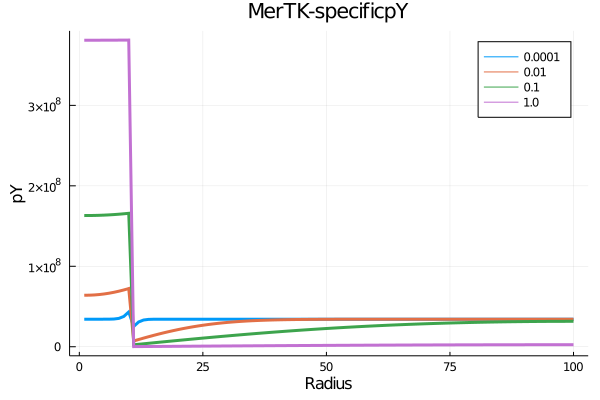

In [30]:
plotpY_MerTK = view(cplot_MerTK, 1, 1, :)
plot(r, plotpY_MerTK, title = "MerTK-specific pY", label = tps[1], lw = 3)

if length(tps) > 1
    for tt = 2:length(tps)
        plotpY_MerTK = view(cplot_MerTK, tt, tt, :)
        plot!(r, plotpY_MerTK, label = tps[tt], lw = 3)
    end
end
xlabel!("Radius")
ylabel!("pY")

In [31]:
cplot_Tyro3 = Array{Float64}(undef, length(tps), length(tps), 100)

4×4×100 Array{Float64,3}:
[:, :, 1] =
 0.0       2.5e-323      0.0  1.37681e-316
 0.0       0.0           0.0  0.0
 0.0       3.53525e-311  0.0  7.29402e-316
 2.0e-323  4.24399e-314  0.0  0.0

[:, :, 2] =
 7.29402e-316  0.0  0.0           7.294e-316
 8.48798e-314  0.0  0.0           2.122e-314
 0.0           0.0  7.29402e-316  7.29407e-316
 0.0           0.0  8.48798e-314  2.122e-314

[:, :, 3] =
 0.0  5.0e-324      3.26787e-311  0.0
 0.0  4.24399e-314  4.24399e-314  0.0
 0.0  0.0           1.2732e-313   6.14732e-316
 0.0  0.0           0.0           0.0

...

[:, :, 98] =
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

[:, :, 99] =
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

[:, :, 100] =
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [32]:
for rr = 1:100
    for t = 1:length(tps)
        pYdata = view(pY, t, :, rr)
        cplot_Tyro3[t, :, rr] .= dot(pYdata, TAMode.recpSpecificC[3])
    end
end

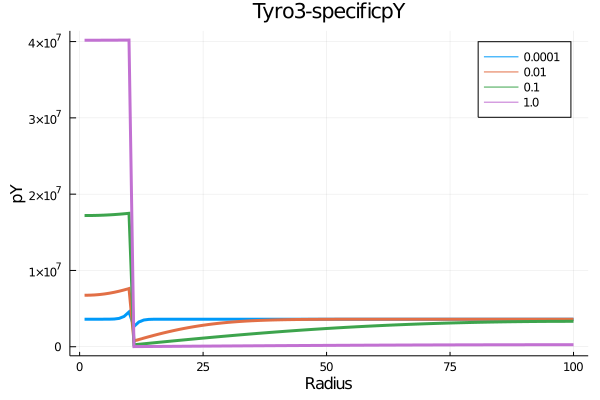

In [33]:
plotpY_Tyro3 = view(cplot_Tyro3, 1, 1, :)
plot(r, plotpY_Tyro3, title = "Tyro3-specific pY", label = tps[1], lw = 3)

if length(tps) > 1
    for tt = 2:length(tps)
        plotpY_Tyro3 = view(cplot_Tyro3, tt, tt, :)
        plot!(r, plotpY_Tyro3, label = tps[tt], lw = 3)
    end
end
xlabel!("Radius")
ylabel!("pY")